# 邏輯回歸二分類實作

## Step 1: 導入所需的套件

In [11]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

## 導入Sklearn中的KNN模組
from sklearn.neighbors import KNeighborsClassifier

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split

## 導入Sklearn中的metrics 評估模型性能指標
from sklearn import metrics

## Step 2: 導入數據集

In [13]:
## 導入數據集
data = pd.read_csv('b_depressed.csv')

## 顯示數據集
data
'''
Survey_id,個人識別ID
Ville_id,村莊識別ID
sex,性別
Age,年齡
Married,結婚
Number_children,小孩數量
education_level,教育程度
total_members,家同成員組數
gained_asset,(獲得收入)
durable_asset,(耐久財產)
save_asset,(存入資產)
living_expenses,(生活費用)
other_expenses,(其他費用)
incoming_salary,(收入來源_薪水)
incoming_own_farm,(收入來源_自己的農場)
incoming_business,((收入來源_企業)
incoming_no_business,
incoming_agricultural,
farm_expenses,
labor_primary,
lasting_investment,
no_lasting_investmen,
depressed
，
耐用資產，
保存資產，
生活費用，
其他費用，
收入工資，
傳入_自己的_農場，
傳入_業務，
沒有業務傳入，
傳入_農業，
農場費用，
勞動初級，
持久投資，
沒有持久投資人，
鬱悶
'''


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 3: 定義自變量與應變量

In [16]:
## 定義自變量與應變量
X = data['Hours'].values
y = data['Pass'].values

print('Independent Variable: ', X)
print('Dependent Variable: ', y)


Independent Variable:  [4 4 2 3 1 1 3 3 4 4 1 1 2 2 3 3 3 3 2]
Dependent Variable:  [1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1]


## Step 4: 將特徵向量轉為2D向量

In [19]:
## 由於 Sklearn 能接受的特徵格式為 (n_samples, n_features)，所以使用 reshape 將特徵資料轉為2D向量，這樣 Sklearn 才能使用，一般狀況下，一維特徵才需要轉換
print('Original X shape: ', X.shape)

## reshape用法: -1代表自動配置幾個框框(程式會自行根據有幾個值配置幾個框框架，也就是拿總共的數量除以後面設定框框內有幾個值)
## 轉為2D向量
X = X.reshape(-1, 1)
print(X)
print('After reshaping data to 2D vector : ', X.shape)

Original X shape:  (19,)
[[4]
 [4]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [4]
 [4]
 [1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [2]]
After reshaping data to 2D vector :  (19, 1)


## Step 5: 將數據集分成訓練集與測試集

In [21]:
## 將數據集分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Step 6: 建立邏輯迴歸模型 Logistic Regression Model 與訓練模型

In [23]:
## 建立邏輯迴歸模型
model = linear_model.LogisticRegression()

## 擬和數據
model.fit(X_train, y_train)

LogisticRegression()

## Step 7: 檢視模型係數與截距 Coeficient & Interception

In [25]:
## 查看建出來的模型係數與截距 y = w1x + w0
w1 = float(model.coef_)
w0 = float(model.intercept_)

print('Coeficient: ', w1)  
print('Interception: ', w0)

Coeficient:  0.09721786218723356
Interception:  0.14063325776508145


C:\Users\wahas\AppData\Local\Temp\ipykernel_19860\99990291.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w1 = float(model.coef_)
C:\Users\wahas\AppData\Local\Temp\ipykernel_19860\99990291.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0 = float(model.intercept_)


## Step 8: Sigmoid - 套入轉換函數 (將Logit(Odds)值轉換成 -> 0~1之間的數值)

In [27]:
## 套用 Sigmoid轉換函數，將值轉換成介於0~1 之間的值(機率)
def sigmoid(x, w0, w1):
    logit_odds = w0 + w1 * x
    return 1 / (1 + np.exp(-logit_odds))
    

## Step 9: 視覺化轉換結果圖

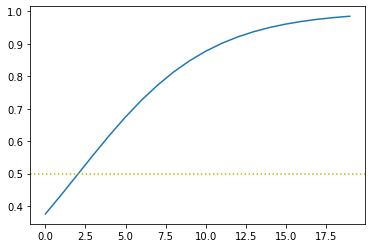

In [87]:
## 視覺化後Sigmoid圖
x = np.arange(0, 20, 1)
result = sigmoid(x, w0, w1)

plt.plot(x, result)

## 畫出50%的機率線
plt.axhline(y = 0.5, ls = 'dotted', color = 'y')


## Step 10: 預測測試集

In [30]:
## 預測測試集
prediction = model.predict(X_test)

print('Real Result: ', y_test)
print('Model Predict: ', prediction)


## 預測自行定義的數據集
result = model.predict([[1], [2], [2.5], [3], [3.5], [4], [5], [6]])

print('Define your own data and predict: ', result)

Real Result:  [0 0 1 0]
Model Predict:  [1 1 1 1]
Define your own data and predict:  [1 1 1 1 1 1 1 1]


## Step 11: 模型預測測試集中每筆數據為0或1的機率

In [33]:
## 預測測試集為1或0的機率
proba = model.predict_proba(X_test)
print('Probability (0 or 1)', proba)

Probability (0 or 1) [[0.41700778 0.58299222]
 [0.44081598 0.55918402]
 [0.37063241 0.62936759]
 [0.44081598 0.55918402]]


## Step 12: 模型表現 - 準確度 Accuracy

In [90]:

## 模型表現
score = model.score(X_test, y_test)
print('Accuracy :' + str(score * 100) + '%')

Accuracy :100.0%
